<a href="https://colab.research.google.com/github/Thuoq/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow-2nd-Edition/blob/main/02_Tensroflow_with_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with Tensorflow

In this notebook we're going to learn how to write neural networkds for classification 

A Classification is where you try to classify something as one thing or another 
A few type of calssification problems:
* Binary Classification 
* Multiclass classificaiton 
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles 
X,y = make_circles(n_samples=n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a litter hard viz it

In [ ]:
import pandas as pd 
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circles.head(5)

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


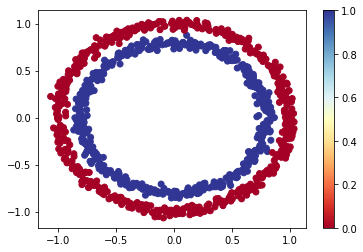

In [ ]:
# Viz with plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu) # label is color and X[:,0] , X[:,1] is coordinates
plt.colorbar(); 

## Input and Output shapes

In [ ]:
# Check the shapes of our featues and labesl
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working 
len(X),len(y)

(1000, 1000)

In [ ]:
# View first examle of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling 

The steps in modelling with TensorFlow are typically: 

1. Create or import a model 
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [ ]:
#import tensorflow 
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Set random set
tf.random.set_seed(42)

# 1. Creating a mode using Sequential API

model_1 = keras.models.Sequential([
                  keras.layers.InputLayer(input_shape=[2]),
                 
                   keras.layers.Dense(1)
])

# 2. Compiling the a model 
model_1.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer = keras.optimizers.Adam(),
                metrics = ["accuracy"])
# 3.  Fitting the a model 

model_1.fit(X,y,epochs=5)



Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240


In [ ]:
# Let's try and improve our model by training for longer 
model_1.fit(X,y,epochs=200,verbose=0)


In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4910


[0.6931543350219727, 0.4909999966621399]

Since we're working oin a binarty classification problem and our model is gettign around ~50% accuract ... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = keras.models.Sequential([
                                  keras.layers.Dense(1),
                                   keras.layers.Dense(1) 
])
# 2. Compile the model 
model_2.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer= keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)


In [ ]:
# 4. Evaluate the model_2
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Imporving our model 

Let's look into our bag of trichs see we can imprve our model . 
1. Create a model -  we might add more layers or increse the number of hidden units 
2. Compiling a model- here we might to choose a different optimization function such as Adam insteadn SGD()
3. FItting a model

In [ ]:
# Set the randome seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = keras.Sequential([
                            keras.layers.Dense(100),
                            keras.layers.Dense(10),
                            keras.layers.Dense(1)
])

# 2. Compile the model 
model_3.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model

model_3.fit(X,y,epochs=100,verbose=0)

In [ ]:
# 4. Evaluating the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [ ]:
model_3.predict(X)

array([[0.48793244],
       [0.55887616],
       [0.56292856],
       [0.5705068 ],
       [0.44141158],
       [0.5738823 ],
       [0.5576486 ],
       [0.48246637],
       [0.47755855],
       [0.5750227 ],
       [0.5148492 ],
       [0.53087693],
       [0.5643773 ],
       [0.45787305],
       [0.45052725],
       [0.46129915],
       [0.54055846],
       [0.46380937],
       [0.54798055],
       [0.50375706],
       [0.50630444],
       [0.58775467],
       [0.45902476],
       [0.4912331 ],
       [0.5832161 ],
       [0.57042587],
       [0.5523935 ],
       [0.4631735 ],
       [0.4577342 ],
       [0.4544098 ],
       [0.47872254],
       [0.57856053],
       [0.55546165],
       [0.46339142],
       [0.45849174],
       [0.589867  ],
       [0.57247376],
       [0.529744  ],
       [0.45870548],
       [0.51092875],
       [0.49994174],
       [0.5463086 ],
       [0.5109905 ],
       [0.45797244],
       [0.52232754],
       [0.53888047],
       [0.44872287],
       [0.544

In [ ]:
import numpy as np

### Note: 
Khi model chạy rất là thấp chúng ta cần biết nó tại sao lại như vậy bằng việc chúng ta sẽ Viz chúng để hiểu rõ prediction nó đã làm gì với dữ liệu của ta 

To VIZ our model's predction, let's create a function `plot_decision_boundary()`

* Take in a trained modle, features (X) and labels (y)
* Create meshgird of different X values 
* Make prediction across the meshgrid
* Plot the predictions as well as a line betwen zones each unique class falss 

In [ ]:

def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created a model predicting X
  Resources: https://cs231n.github.io/
  https://github.com/GokuMohandas/MadeWithML
  """
  # Defined the axis boundaris of the plot and create a meshgird
  x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  # Create X value (we're going to make prediction on these )
  x_in = np.c_[xx.ravel(),yy.ravel()] # Stack 2D arrays together 
  
  # Make prediction 
  y_pred = model.predict(x_in)
  # Check for mutiples class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  #Plot the decision boundary

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


In [ ]:
x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

In [ ]:
xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))

In [ ]:
xx.shape,yy.shape

((100, 100), (100, 100))

In [ ]:
 x_in = np.c_[xx.ravel(),yy.ravel()]
 x_in.shape

(10000, 2)

In [ ]:
y_pred = model_3.predict(x_in)
y_pred.shape

(10000, 1)

Doing binary classification


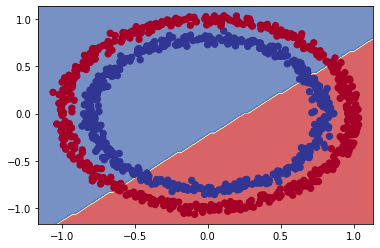

In [ ]:
# CHeck out the prediction our model is making 
plot_decision_boundary(model=model_3,X=X,y=y)

In [ ]:
# Let's see if our model can be used for a regression problem 

tf.random.set_seed(42)

# Create some regression data 

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = x + 100
# Split our regression data into training and testse

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data

model_3.fit(X_reg_train,y_reg_train,epochs=100,verbose=0)
model_3.evaluate(X_reg_test,y_reg_test)

ValueError: ignored

Oh wait .. we compiled model for a binary classificaiton problem 

Buit ... we're now working on a regression , let change the model to suit our data

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Creating the model
model_3 = keras.Sequential([
                            keras.layers.Dense(100),
                            keras.layers.Dense(10),
                            keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss fnc 

model_3.compile(loss=keras.losses.mae,
                optimizer='adam',
                metrics=['mae'])

# 3. Fiting the model
model_3.fit(X_reg_train,y_reg_train,epochs=100,verbose=0)

# 4. Evaluate 
model_3.evaluate(X_reg_test,y_reg_test);

2/2 [==============================] - 0s 6ms/step - loss: 57.8927 - mae: 57.8927


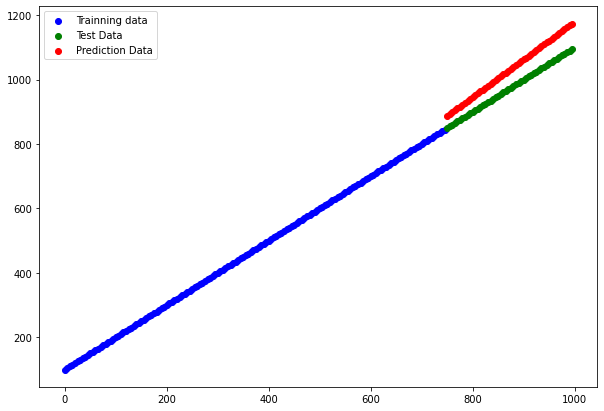

In [ ]:
y_reg_pred = model_3.predict(X_reg_test)
# Plot the model's predction again 
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label="Trainning data")
plt.scatter(X_reg_test,y_reg_test,c='g',label="Test Data")
plt.scatter(X_reg_test,y_reg_pred,c='r',label="Prediction Data")
plt.legend()
plt.show()

In [ ]:
 X_ reg_test[0]

<tf.Tensor: shape=(), dtype=int32, numpy=750>

## The missing pice: Non-Linearity 

In [ ]:
# Set the random seeed
tf.random.set_seed(42)

# 1. Create the model 
model_4 =  keras.Sequential([
  keras.layers.Dense(1,activation=keras.activations.linear)
])
# 2. Compile the model 
model_4.compile(loss=keras.losses.binary_crossentropy,
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])
# 3 fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

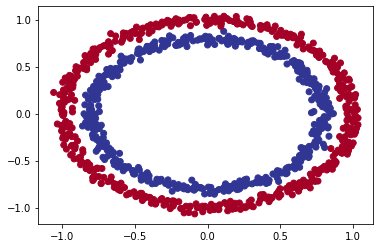

In [ ]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

Doing binary classification


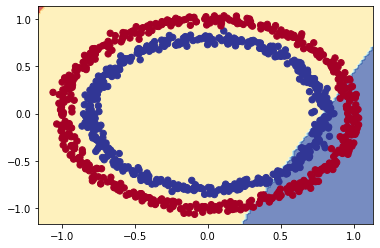

In [ ]:
# Check the decsion bounday for our latest modekl
plot_decision_boundary(model=model_4,X=X,y=y)

Let's try build our first neural network with a none-linear activation function.

In [ ]:
# set random seed
tf.random.set_seed(42)
#1. Create a model with a non-linear activation 

model_5 = keras.Sequential([
                            keras.layers.Dense(1,activation='tanh')
])
#2. Compile the model
model_5.compile(loss=keras.losses.binary_crossentropy,
                optimizer= keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
#3. Fit the model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2966 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2298 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1596 - accuracy: 0.4770
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1186 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0979 - accuracy: 0.4600
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0293 - accuracy: 0.4520
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9258 - accuracy: 0.4400
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7973 - accuracy: 0.4280
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7783 - accuracy: 0.4270
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7691 - accuracy: 0.4270
Epoch 11/

In [ ]:
# TIme to repicate the multi-layer neural network from TensorFlow 

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_6  = keras.Sequential([
                             keras.layers.Dense(4,activation='relu'),
                             keras.layers.Dense(4,activation='relu'),
                             keras.layers.Dense(1)
])
# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 2.5182e-04 - accuracy: 1.0000


[0.00025182380340993404, 1.0]

Doing binary classification


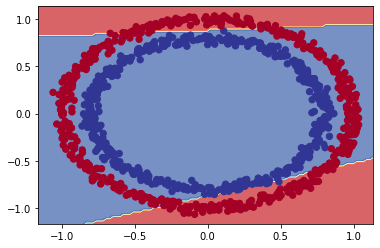

In [ ]:
# How do our model predction looks? 
plot_decision_boundary(model=model_6,
                       X=X,y=y)

In [ ]:
# TIme to repicate the multi-layer neural network from TensorFlow 

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_7  = keras.Sequential([
                             keras.layers.Dense(4,activation='relu'),
                             keras.layers.Dense(4,activation='relu'),
                             keras.layers.Dense(1,activation=keras.activations.sigmoid)
])
# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

Doing binary classification


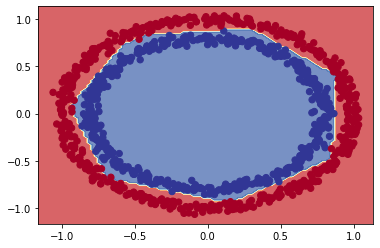

In [ ]:
# How do our model predction looks? 
plot_decision_boundary(model=model_7,
                       X=X,y=y)

Now we've thảo luận concep linea và non-linear func 